In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
#read in data
df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

# Larceny/Theft was the most common crime in San Francisco during the Summer of 2014, and occured mostly during the weekend and at night! 

### As can be seen in Fig. 1, Larceny/Theft was the most common of 34 crime categories and accounted for almost 35% of the total reported crimes in San Francisco during the summer of 2014.

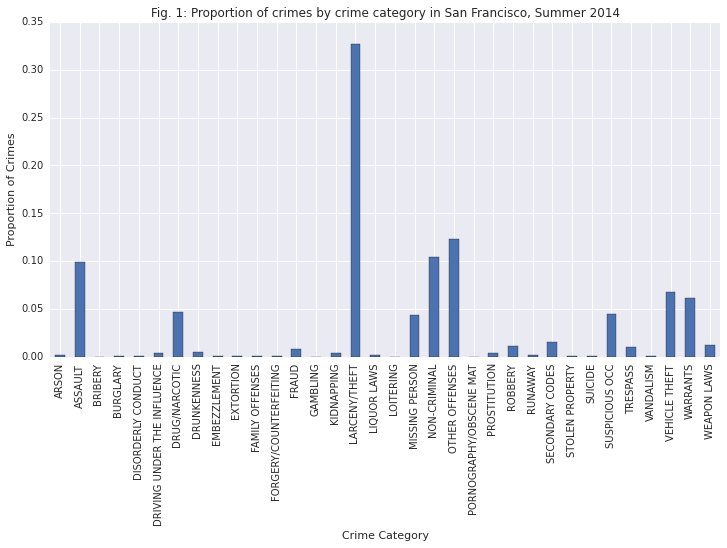

In [3]:
#code for reproducability
crimes = df.groupby('Category').IncidntNum.count()/len(df.IncidntNum)
ax = crimes.plot(kind='bar', figsize=(12,6), 
                 title='Fig. 1: Proportion of crimes by crime category in San Francisco, Summer 2014')
ax.set_xlabel('Crime Category')
ax.set_ylabel('Proportion of Crimes')

### Additionally, as shown in Fig. 2 Larceny/Theft occured most frequently on Saturday, followed closely by Sunday and Friday compared to a relativly flat and low value during the weekdays.

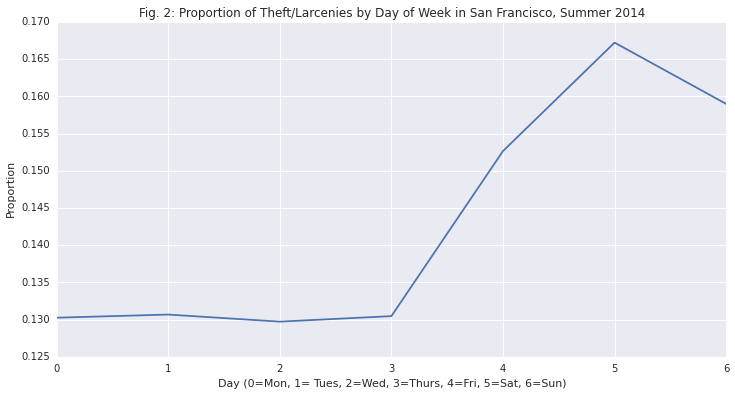

In [4]:
#code for reproducability
df2=df[df.Category=='LARCENY/THEFT']
df3=pd.DataFrame({'DayOfWeek':['Monday', 'Tuesday', 'Wednesday','Thursday',
                               'Friday','Saturday','Sunday'],'num':[0,1,2,3,4,5,6]})
df2=pd.merge(df2,df3,on='DayOfWeek')
crimes2 = df2.groupby('num').IncidntNum.count()/len(df2.IncidntNum)
ax2 = crimes2.plot(figsize=(12,6), 
                   title='Fig. 2: Proportion of Theft/Larcenies by Day of Week in San Francisco, Summer 2014')
ax2.set_xlabel('Day (0=Mon, 1= Tues, 2=Wed, 3=Thurs, 4=Fri, 5=Sat, 6=Sun)')
ax2.set_ylabel('Proportion')


### Larceny/Theft was most common at night as shown in Fig. 3, with a steep reduction in the morning followed by a steady increase throughout the day.

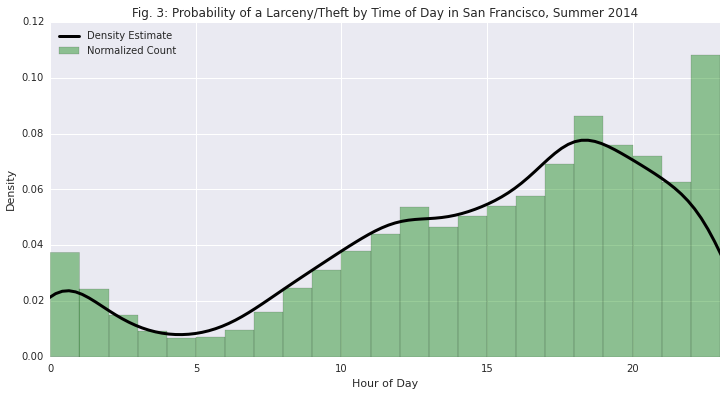

In [5]:
#code for reproducability
df2['hour'] = df2.Time.map( lambda x: pd.to_datetime(x).hour);
sns.set(rc={"figure.figsize": (12, 6)});
sns.distplot(df2.hour.values,bins=range(24),
             kde_kws={"color": "k", "lw": 3, "label": "Density Estimate"}, 
             hist_kws={"color": "g", 
                       "label": "Normalized Count"})

plt.title('Fig. 3: Probability of a Larceny/Theft by Time of Day in San Francisco, Summer 2014')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim((0,23));